**Collection of Data**

In [1]:
import pandas as pd

In [2]:
url_dataset = pd.read_csv("url_dataset.csv")

In [3]:
url_dataset.head(10)

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,web_traffic,domain_registration_length,age_of_domain,dns_record,statistical_report
0,http,www.liquidgeneration.com,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0
1,http,www.onlineanime.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,http,www.ceres.dti.ne.jp,~nekoi/senno/senfirst.html,0,0,0,0,1,0,0,1,1,0,1,1,1,0
3,http,www.galeon.com,kmh/,0,0,0,0,0,0,0,1,1,0,1,1,1,0
4,http,www.fanworkrecs.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,0
5,http,www.animehouse.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
6,http,www2.117.ne.jp,~mb1996ax/enadc.html,0,0,0,0,2,0,0,1,1,2,1,1,1,0
7,http,archive.rhps.org,fritters/yui/index.html,0,0,0,0,0,0,0,1,1,2,1,1,1,0
8,http,www.freecartoonsex.com,NaN,0,0,0,0,0,0,1,1,1,2,1,1,1,0
9,http,www.cutepet.org,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0


In [4]:
url_dataset.columns

Index(['protocol', 'domain_name', 'address', 'long_url', 'having_@_symbol',
       'redirection_//_symbol', 'prefix_suffix_seperation', 'sub_domains',
       'having_ip_address', 'shortening_service', 'https_token',
       'abnormal_url', 'web_traffic', 'domain_registration_length',
       'age_of_domain', 'dns_record', 'statistical_report'],
      dtype='object')

In [5]:
urls = url_dataset.drop(url_dataset.columns[[0,1,2]],axis=1)

In [6]:
urls.head()

,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,web_traffic,domain_registration_length,age_of_domain,dns_record,statistical_report
0,0,0,0,0,0,0,0,1,1,2,1,1,1,0
1,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,0,0,0,0,1,0,0,1,1,0,1,1,1,0
3,0,0,0,0,0,0,0,1,1,0,1,1,1,0
4,0,0,0,0,0,0,0,1,1,1,1,1,1,0


In [7]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [8]:
urls_without_labels = urls.drop('statistical_report',axis=1)
urls_without_labels.columns
labels = urls['statistical_report']


In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [10]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1309 562 1309 562


In [11]:
labels_train.value_counts()

0    935
1    374
Name: statistical_report, dtype: int64

In [12]:
labels_test.value_counts()

0    406
1    156
Name: statistical_report, dtype: int64

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [14]:
random_forest_classifier.fit(data_train,labels_train)


C:\Users\mi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
rf_ypred = random_forest_classifier.predict(data_test)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
cpnfusionMatrix = confusion_matrix(labels_test,rf_ypred)
print(cpnfusionMatrix)
rfacc=accuracy_score(labels_test,rf_ypred)
rfacc

[[397   9]
 [102  54]]


0.802491103202847

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = [0,1]
sns.heatmap(cpnfusionMatrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

<Figure size 640x480 with 2 Axes>

# SVM

In [18]:
from sklearn import svm

support = svm.LinearSVC(random_state=42)
support.fit(data_train,labels_train)
svm_y_pred = support.predict(data_test)
svm_y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [19]:
cpnfusionMatrix = confusion_matrix(labels_test,svm_y_pred)
print(cpnfusionMatrix)
svmacc=accuracy_score(labels_test,svm_y_pred)
svmacc

[[382  24]
 [100  56]]


0.7793594306049823

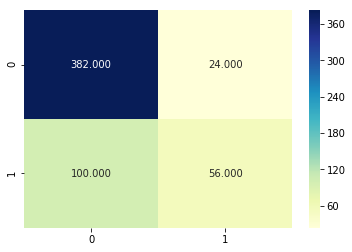

In [20]:
labels = [0,1]
sns.heatmap(cpnfusionMatrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

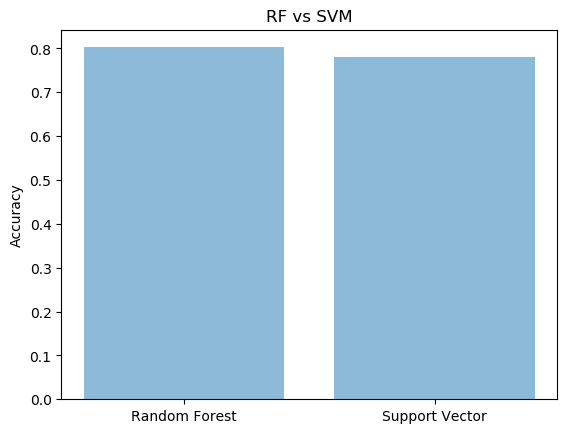

In [21]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

objects = ('Random Forest','Support Vector')
y_pos = np.arange(len(objects))
performance = [rfacc,svmacc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('RF vs SVM')

plt.show()